# Electrically-Coupled Nanoantenna Resonators

In this note we explore two nanoantenna resonators that are electrically connected with similarly-scaled wires.  The approach is to capture the salient physics of the coupled resonant dynamics using effective circuit models.  This approach is motivated by the fact that one can model each antenna's resonance as a damped harmonic oscillator {cite:p}`metzgerThirdharmonicSpectroscopyModeling2012, hentschelQuantitativeModelingThird2012,putnamOpticalfieldcontrolledPhotoemissionPlasmonic2017, keathleyVanishingCarrierenvelopephasesensitiveResponse2019a`.  We see that this can be modeled by an RLC circuit in series with the intuition that the external optical fields drive the system.  

In the following, we start with development of the effective circuit model and provide physical motivation. We build up from a single antenna, to two coupled antennas that are attached via twin leads.  We then drive the system and study the outputs to investigate the physics, and explore how coupling impacts the resulting local fields at each antenna.  

## Motivating the Circuit Model

We can imagine that charges oscillate in the antenna structure as driven the the exciting E-field.  In {numref}`fig-single-antenna-rlc` we a point of maximum charge separation and the resulting external field lines.  The external field lines lead to a capacitive coupling between the top and bottom of the antenna.  Furthermore, as the charges move through the antenna, there is loss and induction.  This leads to the effective circuit model on the right.  The electric field waveform can be mapped directly to an effective voltage waveform that drives the effective RLC in series.  

```{figure} ../figures/single-antenna-rlc.png
---
width: 800px
name: fig-single-antenna-rlc
---
The effective circuit model for a single antenna.
```
Note that as the capacitance maps directly to the fields surrounding the antenna structure, we interpret that the fields surrounding the antenna structure should map with a one-to-one correspondence with the voltage on the capacitor.  Indeed, we find that the voltage on the capacitance can be written as:

$$ V_C = \frac{\tilde{V}(\omega)}{1 - \omega^2 C L + j\omega C R} \mathrm{.}$$

This then relates directly to the known enhanced field response at the tip for instance which can be expressed as

$$ E_\mathrm{tip} \propto \frac{\tilde{E}_\mathrm{inc}(\omega)}{\omega_\mathrm{res}^2 - \omega^2 - j\omega/\tau} \mathrm{,} $$

where $\tau$ is the damping time and $\omega_\mathrm{res}$ the resonance frequency of the oscillator.

Interestingly, one might think that adding in new elements would make the situation significantly more complicated.  Consider the addition of a wire at the bottom of the antenna tip as shown in {numref}`fig-single-antenna-wire-rlc`.  


```{figure} ../figures/antenna-wire-rlc.png
---
width: 800px
name: fig-single-antenna-wire-rlc
---
The effective circuit model for a single antenna with a wire.
```

Here, we can roughly define three regions with effective capacitance, now considering the system with the wire coupled to it.  There is the body capacitance $C_\mathrm{B}$, the wire to body capacitance $C_\mathrm{W}$ and the tip to wire gap capacitance $C_\mathrm{g}$. We realize this is already simplified in ignoring any resistance or inductance in the wire itself. 

Since we are usually concerning ourselves with the enhanced fields in the gap of the antenna for applications, we can solve for those by then solving for $V_\mathrm{g}$ the voltage on $C_\mathrm{g}$.  With a bit of work we find this is expressed as:

$$ \tilde{V}_\mathrm{g}(\omega) = \frac{\tilde{V}(\omega)}{j \omega AC_\mathrm{g}R - \omega^2 A L C_\mathrm{g}
     + C_\mathrm{g}/C_\mathrm{b} (A - 1) } $$
     
Note that to within a constant multiple, this can be rewritten as the response of an RLC in series, thus significantly simplifying our problem.  This justifies latersubstitutions where we switch to an effective RLC model despite the addition of collector wires.  

## Transmission Line Simulation

Now that we have the effective circuit models for the individual resonators, we can add the next layer of coplexity: the connecting wires.  These wires behave more like transmission lines as they can couple traveling waves.  This is important as if the wires get longer, they can cary waves over a macroscopic distance.  This induces a propagation delay that coudl be observed.  Also, it leads to a different profile in the resonant waveform that gets induced across both sets of antennas.

Here we model a pair of antennas connected via a transmission line.  The antennas follow the coupled oscillator approach similar to above.  However, now, instead of a lumped element coupler, we use a finite-length transmission-line coupler between the antenna pair.

A sketch of the physical device and its effective circuit model that we will use are shown in {numref}`fig-effective-t-line-ckt`.  


```{figure} ../figures/t-line-effective-ckt.png
---
width: 800px
name: fig-effective-t-line-ckt
---
An effective circuit for two coupled oscillators connected by a transmission line.  Forward and backward waves create reflection effects, and couple the two oscillators together.
```

We emphasize here that the two RLC models are effective circuit parameters.  While this may seem very simplified, it is incredibly powerful.  Several past works {cite:p}`metzgerThirdharmonicSpectroscopyModeling2012, hentschelQuantitativeModelingThird2012`, including those of ours {cite:p}`putnamOpticalfieldcontrolledPhotoemissionPlasmonic2017, keathleyVanishingCarrierenvelopephasesensitiveResponse2019a`, have shown that the fields that build up on the capictive element can be tuned to quantitatively predict the temporal profile of a plasmonic resonator. All of the paramters can be fit phenomenologically based on comparisons to experimental and/or simulation data.  Wherever possible, though, we motivate parameter choices using first-principles.

Below we outline our procedure for modeling the coupled resonators, including the selection of effective parameters for the circuit models.  This analysis can easily be extended, and full-wave simulations and experimental data can be used to tune-in the effective system parameters. 

### But First: A Note on Units

For convenience in all of the code below we use a modified unit system defined using the natural length scales of the problem: nanometers and femtoseconds.  Where relevant we denote the nm-fs units are denoted as SI units with an n subscript.  

This nm-fs unit system leads to the conversions shown in {numref}`nm-fs-conversion-table`

```{table} Conversion from SI to nm-fs units for the calculations that follow.
:name: nm-fs-conversion-table

| Property | SI Unit | nm-fs units | 
| --- | --- | --- |
| Capacitance | F | $10^{12}$ F<sub>n</sub> |
| Inductance | H | $10^{18}$ H<sub>n</sub>  |
| Resistance | $\Omega$ | $10^{3}$ $\Omega$<sub>n</sub> |
| $\epsilon_0$ | F/m | $10^{3}$ F<sub>n</sub>/nm |
| $\mu_0$     | H/m | $10^{9}$ H<sub>n</sub>/nm |

```

### Pulse Setup

We start by defining a waveform to drive each antenna.  These are defined as $V_1(t)$ and $V_2(t)$ for antenna 1 and antenna 2. These voltage waveforms are directly proportional to the incident electric field driving the antennas.  Below, we sert the pulses so that they more closely match what we are experimentally capable of generating in our laboratory, but these could of course be tuned for any duration and wavelength.  

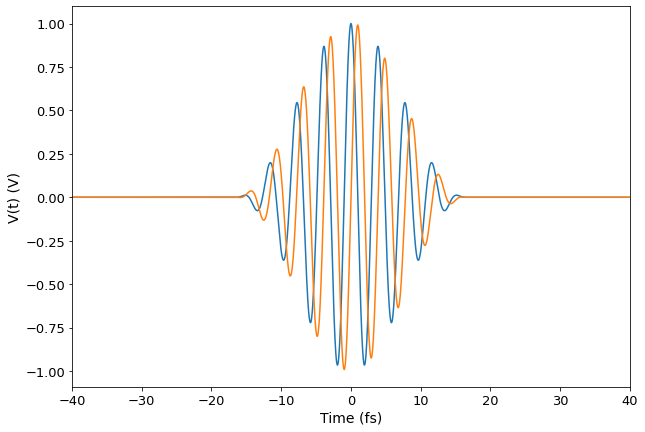

In [1]:
import numpy as np
import matplotlib.pyplot as plt


import sys
sys.path.append('../includes')
import pulse_functions as pulses

# -- Constants -- 
c = 300 #Speed of light in nm/fs
eps0 = 8.85418782e-12*1e3 #permittivity of freespace in nm, fs units
mu0 = 1.25663706e-6*1e9 #permeability of freespace in nm, fs units

# -- Settings -- 

#Time axis in femtoseconds
t = np.linspace(-1000, 1000, 100000)

#FWHM in fs
fwhm = 12 

#Central wavelength in nm
yc = 1170 

#Phase delay
phaseDelay = -1*np.pi/2

# ------------------------------

# -- Calculations -- 
fc = c/yc
wc = 2*np.pi*fc

#Incident pulses for each side:
V1 = 1.0*pulses.cos2pulse(t, fwhm, wc, 0)['E']
V2 = 1.0*pulses.cos2pulse(t, fwhm, wc, phaseDelay)['E']


# -- Plots -- 
fig = plt.figure()
fig.set_size_inches(10, 7)

plt.plot(t, V1, t, V2)
plt.xlim(-40, 40);
plt.xlabel('Time (fs)', fontsize=14)
plt.ylabel('V(t) (V)', fontsize=14)
plt.tick_params(labelsize=13)


### Excited Wave At Single Antennas

Now we examine the excited wave at the antenna given no transmission line (i.e. no coupling between the resonators). The field at the antenna is diretly proportional to the voltage waveform on the capacitor, which is what we study here. 

The parameters that we set, which are based on actual experimenta nd electromagnetic simulation, are the decay time $\tau$ and the resonance wavelength $\lambda_\mathrm{res}$.  We also set an effective capacitance.  This value is based on static examinations of the device capacitance, but can be adjusted for fits later when applying the transmission line.  This is important as it sets an effective load impedance that is part of setting the reflectivity at the connection point.  

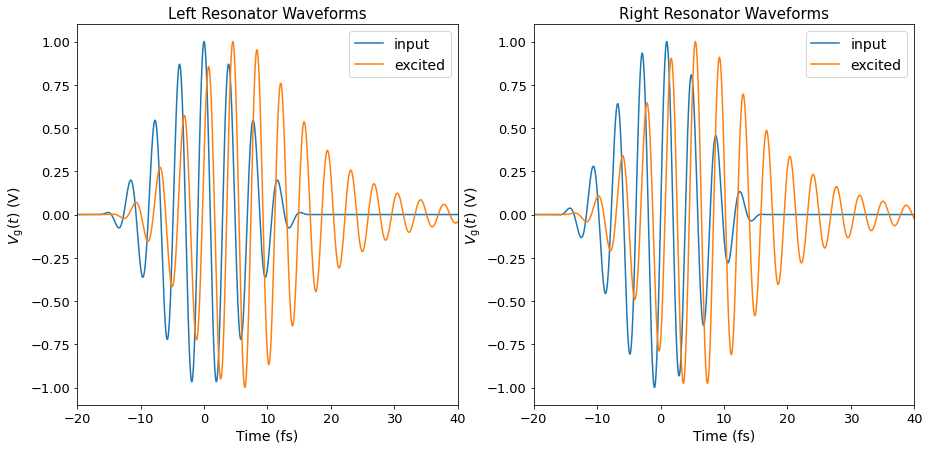

In [2]:
tau1 = 5
yres1 = 1100
C1 = 10e-18*1e12

tau2 = 5
yres2 = 1100
C2 = 10e-18*1e12

# -- Calculations -- 
dt = t[1] - t[0]
w = np.fft.fftfreq(t.size, d=dt)*2*np.pi

w[np.where(w == 0)[0]] = 1e-18

wres1 = 2*np.pi*c/yres1
L1 = 1/(wres1**2*C1)
R1 = 1/(wres1**2*tau1*C1)
V1f = np.fft.fft(V1)
Vin1f = V1f/(1 - w**2*C1*L1 + 1j*w*C1*R1)
Vin1 = np.real(np.fft.ifft(Vin1f))

wres2 = 2*np.pi*c/yres2
L2 = 1/(wres1**2*C2)
R2 = 1/(wres1**2*tau1*C2)
V2f = np.fft.fft(V2)
Vin2f = V2f/(1 - w**2*C2*L2 + 1j*w*C2*R2)
Vin2 = np.real(np.fft.ifft(Vin2f))

# -- Plots -- 
fig = plt.figure()
fig.set_size_inches(15, 7)

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.plot(t, V1/np.abs(V1).max(), label='input')
ax1.plot(t, Vin1/np.abs(Vin1).max(), label='excited')
ax1.set_xlim(-20, 40)

ax2.plot(t, V2/np.abs(V2).max(), label='input');
ax2.plot(t, Vin2/np.abs(Vin2).max(), label='excited')
ax2.set_xlim(-20, 40);

ax1.set_xlabel('Time (fs)', fontsize=14)
ax1.set_ylabel(r'$V_\mathrm{g}(t)$ (V)', fontsize=14)
ax1.tick_params(labelsize=13)
ax1.set_title('Left Resonator Waveforms', fontsize=15)
ax1.legend(fontsize=14)

ax2.set_xlabel('Time (fs)', fontsize=14)
ax2.set_ylabel(r'$V_\mathrm{g}(t)$ (V)', fontsize=14)
ax2.tick_params(labelsize=13)
ax2.set_title('Right Resonator Waveforms', fontsize=15);
ax2.legend(fontsize=14);

### Connecting With a Transmission Line: Initial Guess as Twin-Lead T-Line

Now we are going to connect the two antennas with a transmission line.  We will start with the approximation of the wire as a twin-lead T-line. 

For this we need to calculate the reflectivity $\Gamma$, the effective impedance $Z_0$, and the propagation constant $\beta$ from the twin-lead equations.  These were taken from [here](https://eng.libretexts.org/Bookshelves/Electrical_Engineering/Electro-Optics/Book%3A_Electromagnetics_II_(Ellingson)/07%3A_Transmission_Lines_Redux/7.01%3A_Parallel_Wire_Transmission_Line) for reference.  While this is a simplified formalism, it captures the general physics quite well, and the waveforms we see bear a striking resemblance already to those from full-wave simulations.

In [8]:
# -- Settings -- 
D = 200 #wire spacing
d = 20 #wire width
l = 700 #wire length
epsr = 1.5 #Effective permittivity

alpha = 1/3000 #loss parameter
#alpha = 1 #High loss -- no coupling

P1 = 0.5 #Amount of R and L the line sees
P2 = 0.5

# -- Calculations -- 
Lp = (mu0/np.pi)*np.log((D/d) + np.sqrt((D/d)**2 - 1))
Cp = np.pi*eps0*epsr/np.log((D/d) + np.sqrt((D/d)**2 - 1))

#Split impedances:
Rt1 = (1 - P1)*R1
Rb1 = P1*R1
Lt1 = (1 - P1)*L1
Lb1 = P1*L1

Zt1 = Rt1 + 1j*w*Lt1
Zb1 = Rb1 + 1j*w*Lb1 + 1/(1j*w*C1)

Rt2 = (1 - P2)*R2
Rb2 = P2*R2
Lt2 = (1 - P2)*L2
Lb2 = P2*L2

Zt2 = Rt2 + 1j*w*Lt2
Zb2 = Rb2 + 1j*w*Lb2 + 1/(1j*w*C2)

#Line impedance and velocity
Z0 = np.sqrt(Lp/Cp) #impedance
v = 1/np.sqrt(Lp*Cp) #velocity
beta = w/v #propagation constant

print(Lp)
print(Cp)

1197.28913708245
1.3939616011958852e-08


After determining all of the transmission line characteristics, we now move forward to calculating the voltage response at each antenna with the transmission line in place.  

Since the system is linear, we do this calculation twice. 

(-20.0, 200.0)

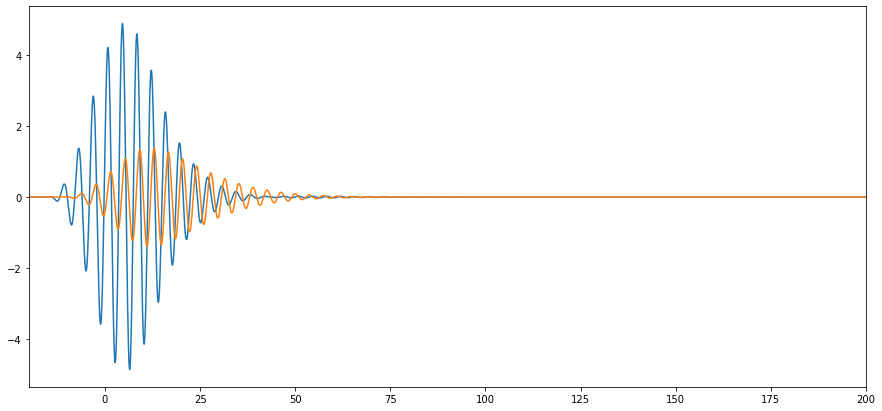

In [4]:
#Load impedance at 2 as seen by source at 1

ZL1 = Zt2*Zb2/(Zt2 + Zb2)

Gamma1 = (ZL1 - Z0)/(ZL1 + Z0)

Zin1 = Z0*(1 + Gamma1*np.exp(-1j*2*beta*l)*np.exp(-2*alpha*l))/(1 - Gamma1*np.exp(-1j*2*beta*l)*np.exp(-2*alpha*l))

Zp1 = Zb1*Zin1/(Zb1 + Zin1)

Vin1f = V1f*Zp1/(Zt1 + Zp1)

Vplus1f = Vin1f/(np.exp(1j*beta*l)*np.exp(alpha*l) + Gamma1*np.exp(-1j*beta*l)*np.exp(-1*alpha*l))
Vo21f = Vplus1f*(1 + Gamma1)

Vg1f = Vin1f/(1 + 1j*w*C1*(Rb1 + 1j*w*Lb1))
Vg21f = Vo21f/(1 + 1j*w*C2*(Rb2 + 1j*w*Lb2))

Vg1 = np.real(np.fft.ifft(Vg1f))
Vg21 = np.real(np.fft.ifft(Vg21f))

# -- Plots -- 
fig = plt.figure()
fig.set_size_inches(15, 7)

ax1 = fig.add_subplot(1, 1, 1)
# ax2 = fig.add_subplot(1, 2, 2)

# ax1.plot(t, V1/np.abs(V1).max())
ax1.plot(t, Vg1)
ax1.plot(t, -1*Vg21)
ax1.set_xlim(-20, 200)

(-50.0, 100.0)

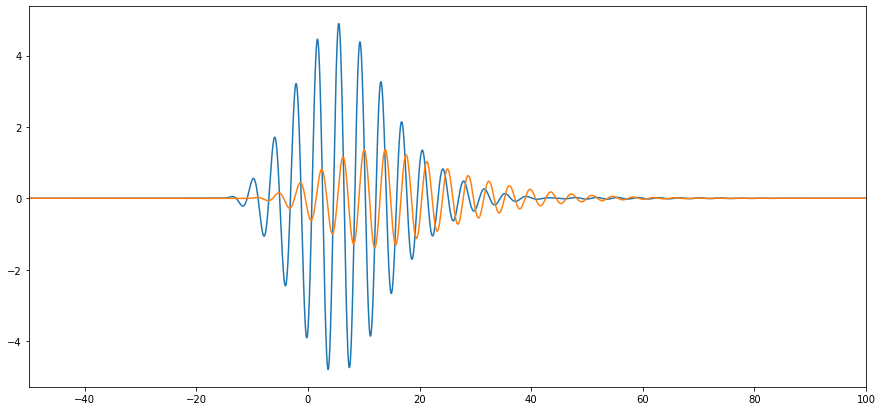

In [5]:
#Load impedance at 2 as seen by source at 1

ZL2 = Zt1*Zb1/(Zt1 + Zb1)

Gamma2 = (ZL2 - Z0)/(ZL2 + Z0)

Zin2 = Z0*(1 + Gamma2*np.exp(-1j*2*beta*l)*np.exp(-2*alpha*l))/(1 - Gamma2*np.exp(-1j*2*beta*l)*np.exp(-2*alpha*l))

Zp2 = Zb2*Zin2/(Zb2 + Zin2)

Vin2f = V2f*Zp2/(Zt2 + Zp2)

Vplus2f = Vin2f/(np.exp(1j*beta*l)*np.exp(alpha*l) + Gamma2*np.exp(-1j*beta*l)*np.exp(-1*alpha*l))
Vo12f = Vplus2f*(1 + Gamma2)

Vg2f = Vin2f/(1 + 1j*w*C2*(Rb2 + 1j*w*Lb2))
Vg12f = Vo12f/(1 + 1j*w*C1*(Rb1 + 1j*w*Lb1))

Vg2 = np.real(np.fft.ifft(Vg2f))
Vg12 = np.real(np.fft.ifft(Vg12f))

# -- Plots -- 
fig = plt.figure()
fig.set_size_inches(15, 7)

ax1 = fig.add_subplot(1, 1, 1)
# ax2 = fig.add_subplot(1, 2, 2)

# ax1.plot(t, V1/np.abs(V1).max())
ax1.plot(t, Vg2)
ax1.plot(t, -1*Vg12)
ax1.set_xlim(-50, 100)


# ax2.plot(t, V2/np.abs(V2).max(), t, Vin2/np.abs(Vin2).max())
# ax2.set_xlim(-20, 40);


(-50.0, 100.0)

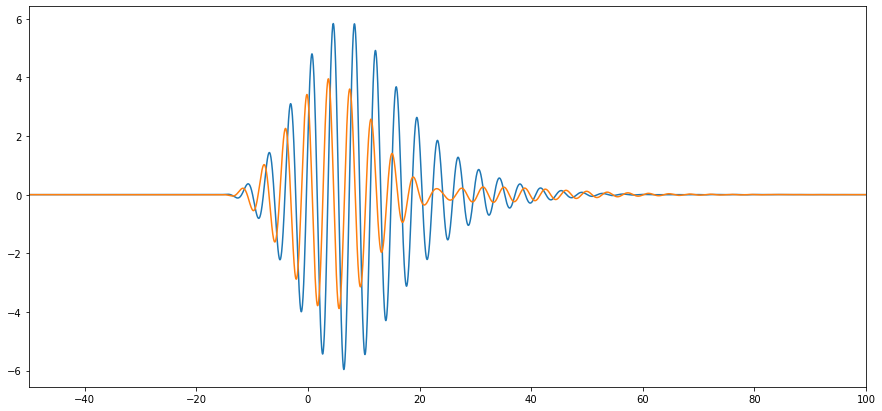

In [6]:
Vg1T = Vg1 + Vg12
Vg2T = Vg2 + Vg21

# -- Plots -- 
fig = plt.figure()
fig.set_size_inches(15, 7)

ax1 = fig.add_subplot(1, 1, 1)

ax1.plot(t, Vg1T)
ax1.plot(t, -1*Vg2T)
ax1.set_xlim(-50, 100)

(-50.0, 100.0)

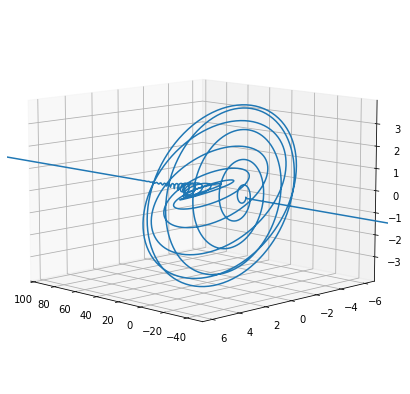

In [7]:
fig = plt.figure()
fig.set_size_inches(10, 7)

ax = plt.axes(projection='3d')
ax.view_init(10, 135)

ax.plot3D(t, Vg1T, Vg2T)
ax.set_xlim(-50, 100)

## Notes

### 2022-12-04

**Notes**
 - So far everything looks perfect -- I really like this model.  It fits every observable thing that we are seeing.  
 - I think that the only remaining thing to include is loss on the transmission line. 
 - That could be loss that is due to the bend and radiation, as well as loss that is on the line
 - For this I should make it purely phenomenological
 - One difference I should keep in mind between this model and experiment (why it will never be 1-1 correspondence) is that in the experiment there is an extended network of these connections!
 
**TODO**
  - [ ] Better label plots
  - [ ] Add in more descriptive text with images and step by step of what is going on in each part
  - [ ] If it makes sense, add in widgets for adjusting different essential parameters (esp. about the pulse and t-line).
    - At least describe the variables.
  - [ ] Clean up introductory parts with simplified models
